In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model
import seaborn as sns
import yfinance as yf
%matplotlib widget
sns.set_style("darkgrid")
sns.set(font_scale=1.7)


In [2]:
def pair(buy_ticker, sell_ticker, long_financials, short_financials):

    ticker1 = yf.Ticker(buy_ticker)
    ticker2 = yf.Ticker(sell_ticker)
    beta_ticker = yf.Ticker("SPY")

    dataFrame1 = ticker1.history(
        start='2010-1-1', actions=True, rounding=True)
    dataFrame2 = ticker2.history(
        start='2010-1-1', actions=True, rounding=True)
    spy = beta_ticker.history(
        start='2010-1-1', actions=True, rounding=True)

    ratio = dataFrame1.Close / dataFrame2.Close
    spread = dataFrame1.Close - dataFrame2.Close

    chart = fig, axes = plt.subplots(3, figsize=(18, 12))
    axes[0].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=dataFrame1, x="Date", y="Close",
                 ax=axes[0], label=buy_ticker)
    sns.lineplot(data=dataFrame2, x="Date", y="Close",
                 ax=axes[0], label=sell_ticker)
    axes[1].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=ratio, ax=axes[1])
    axes[2].set_title(f"{buy_ticker} / {sell_ticker}")
    sns.lineplot(data=spread, ax=axes[2])
    plt.tight_layout(pad=1)

    spy_ticker1 = pd.concat(
        [spy.Close[-500::], dataFrame1.Close[-500::]], axis=1)
    spy_ticker1.columns = ["SPY", buy_ticker]
    long_data_pct = np.log(spy_ticker1/spy_ticker1.shift())
    ticker1_cov = long_data_pct.cov().iloc[0, 1]
    ticker1_var = long_data_pct["SPY"].var()
    long_beta = ticker1_cov/ticker1_var
    print("Long BETA:", np.round(long_beta, 2))

    spy_ticker2 = pd.concat(
        [spy.Close[-500::], dataFrame2.Close[-500::]], axis=1)
    spy_ticker2.columns = ["SPY", sell_ticker]
    short_data_pct = np.log(spy_ticker2/spy_ticker2.shift())
    ticker2_cov = short_data_pct.cov().iloc[0, 1]
    ticker2_var = short_data_pct["SPY"].var()
    short_beta = ticker2_cov/ticker2_var
    print("Short BETA:", np.round(short_beta, 2))

    # financials:
    print(long_financials)
    print(short_financials)

    return chart


Long BETA: 1.38
Short BETA: 0.88
Long position MAC P/E ratio = 39.791668, dividend: 0.0636, Gross profit: 487080000
short position RES P/E ratio = 23.948719, dividend: 0.009, Gross Profit: 201667000


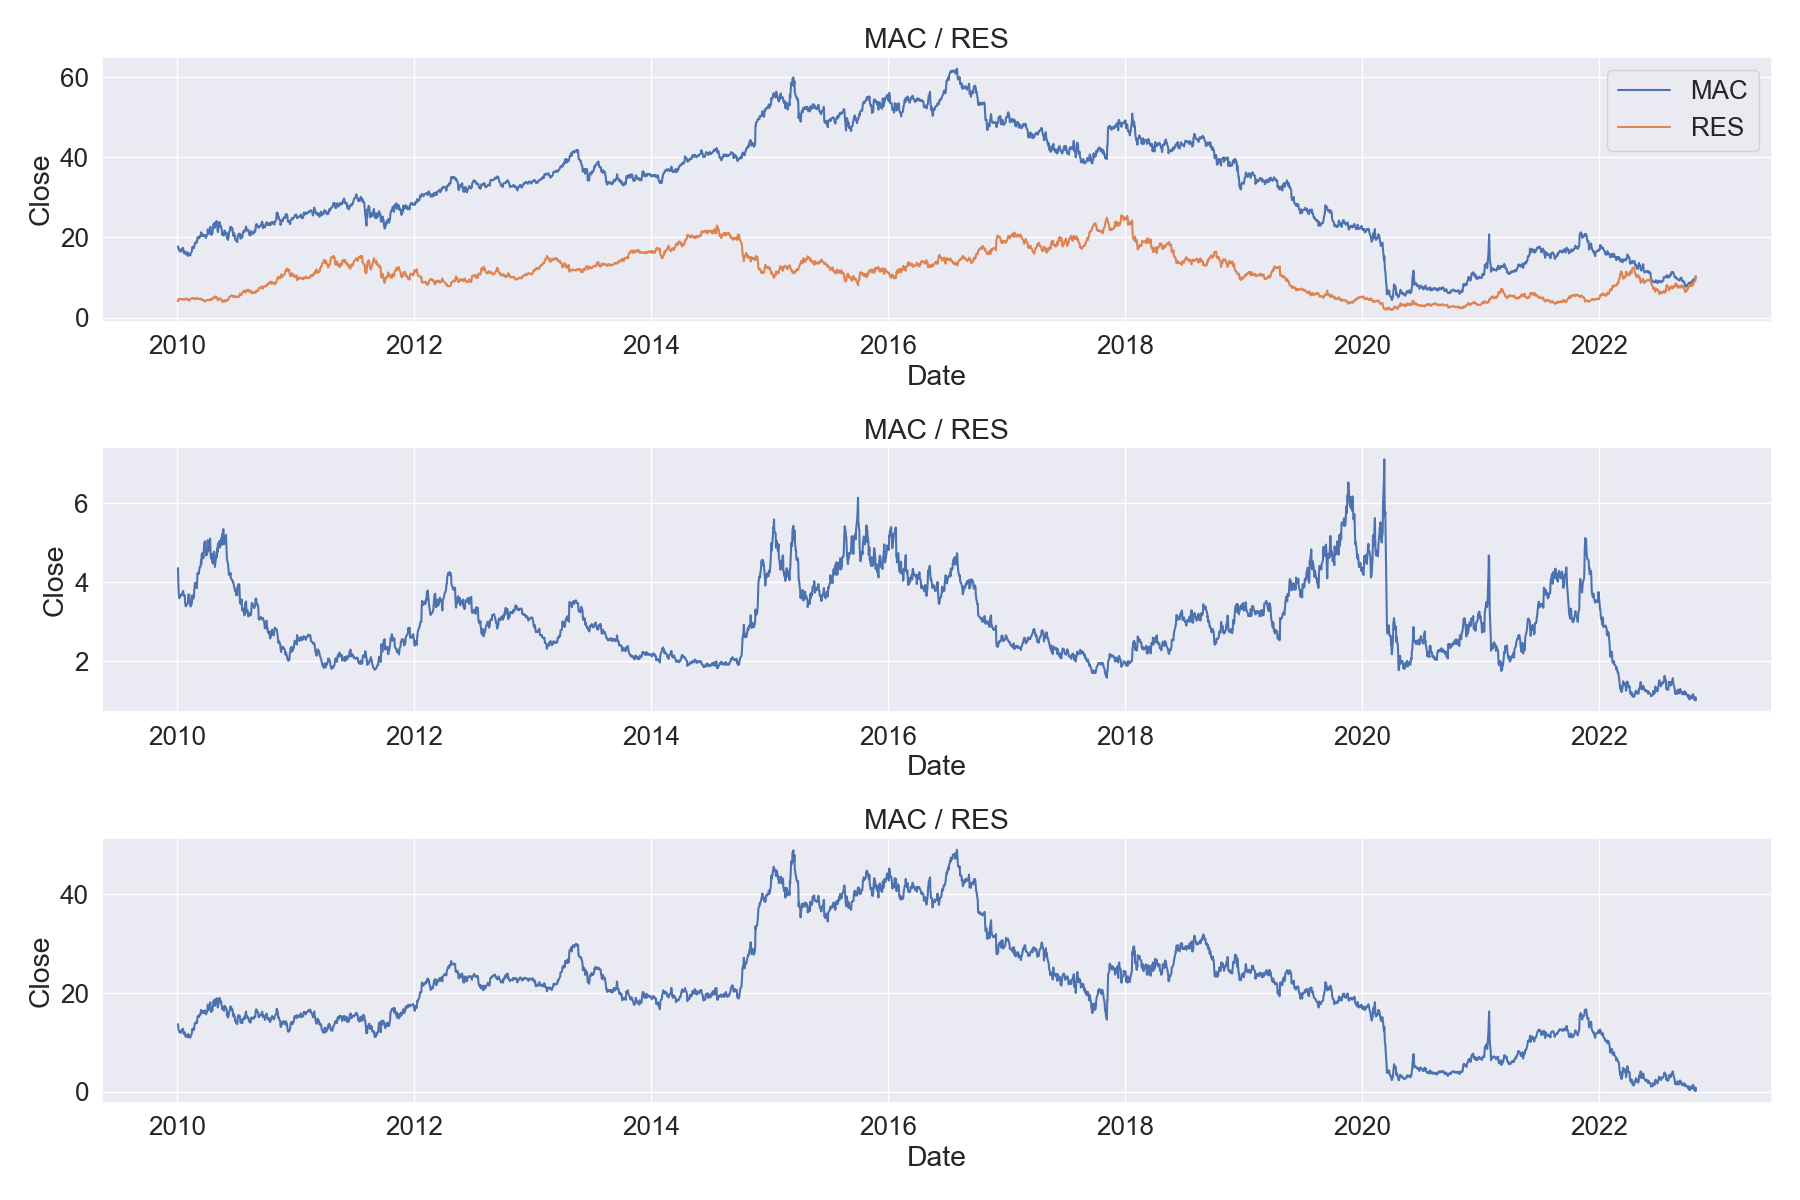

In [9]:
pair("MAC", "RES", "Long position MAC P/E ratio = 39.791668, dividend: 0.0636, Gross profit: 487080000",
     "short position RES P/E ratio = 23.948719, dividend: 0.009, Gross Profit: 201667000");

Long BETA: 1.05
Short BETA: 0.83
Long position SCS P/E ratio = 54.307693, dividend: 0.056700002, Gross Profit: 761500000
short position NYCB P/E ratio = 6.928571, dividend: 0.0801, Gross profit: 1347000000


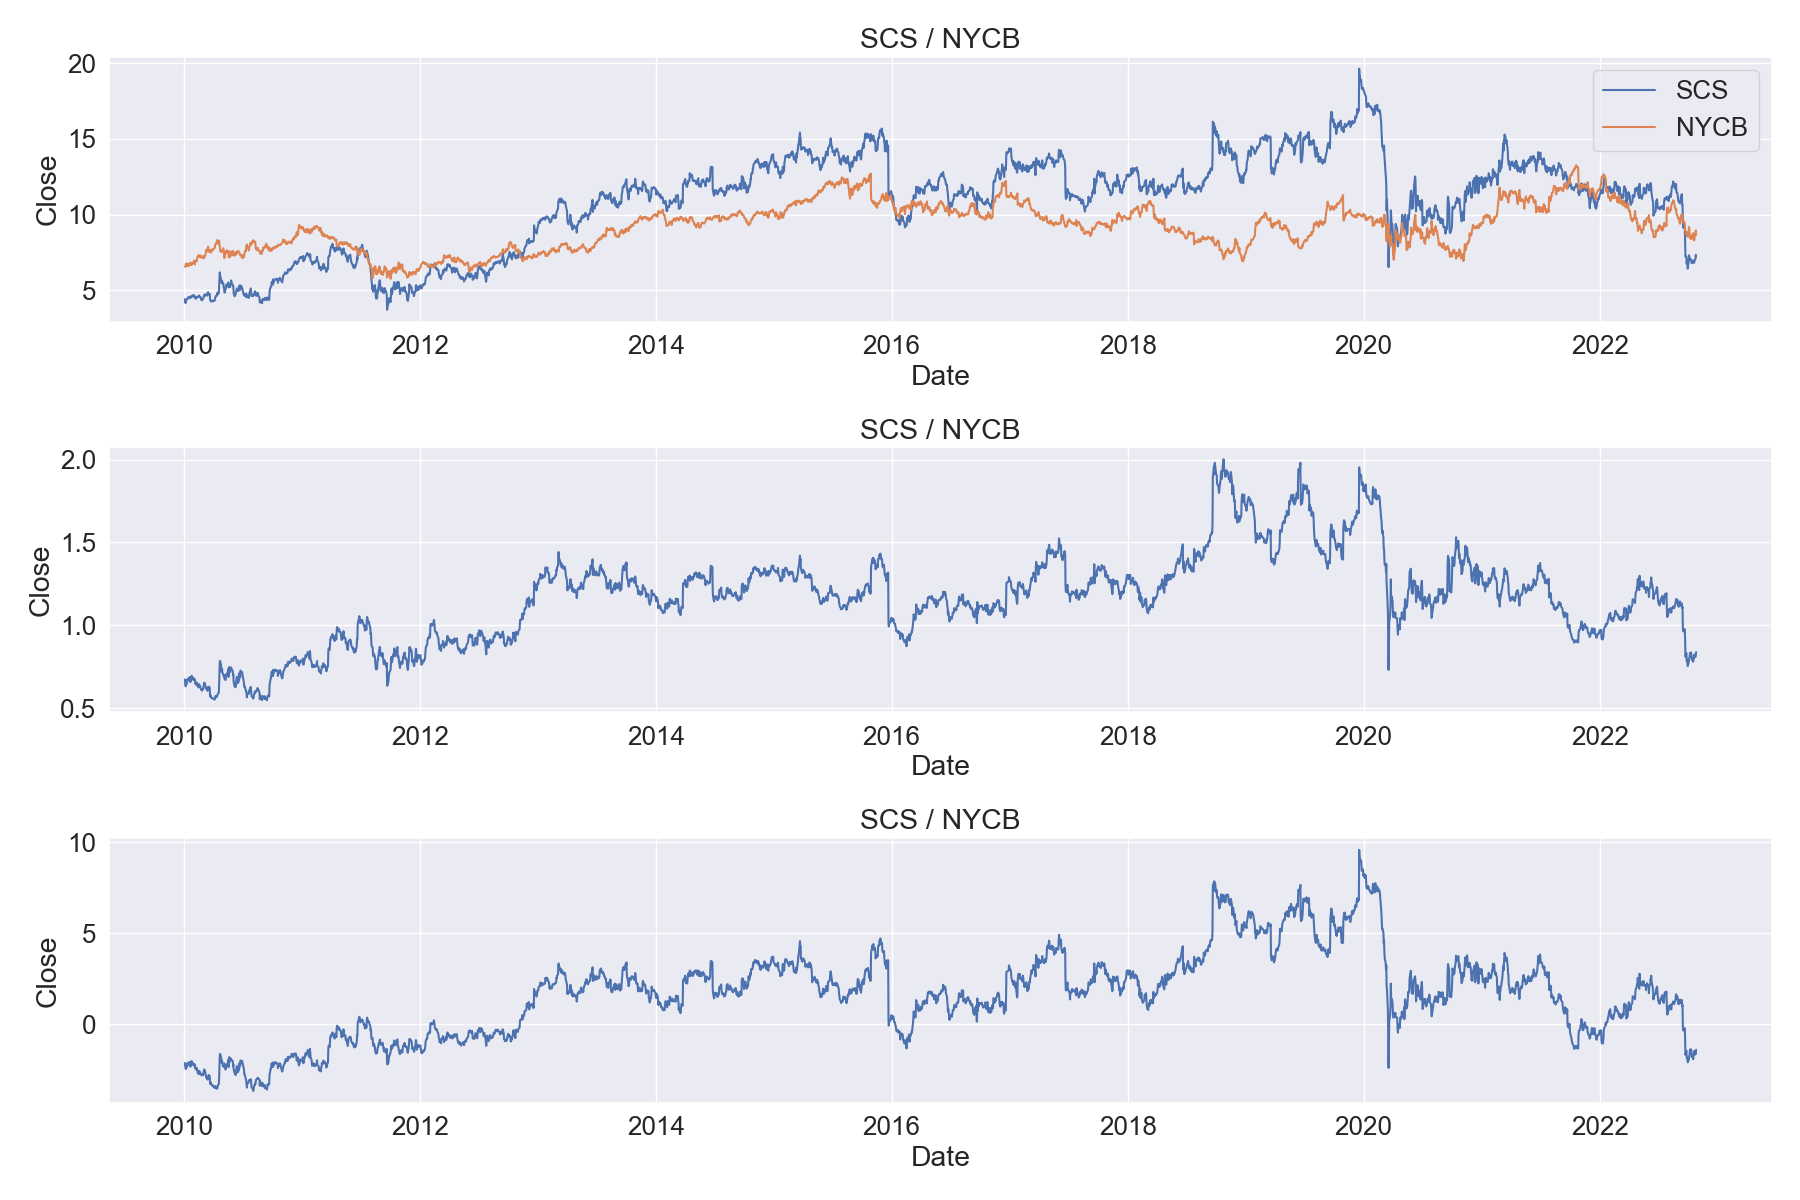

In [11]:
pair("SCS", "NYCB", "Long position SCS P/E ratio = 54.307693, dividend: 0.056700002, Gross Profit: 761500000",
     "short position NYCB P/E ratio = 6.928571, dividend: 0.0801, Gross profit: 1347000000");

Long BETA: 0.83
Short BETA: 1.22
Long position PDM P/E ratio = 26.157894, dividend: 0.0845, Gross profit: 317778000
short position SHO P/E ratio = 15.823529, dividend: 0.0186, Gross Profit: 186085000


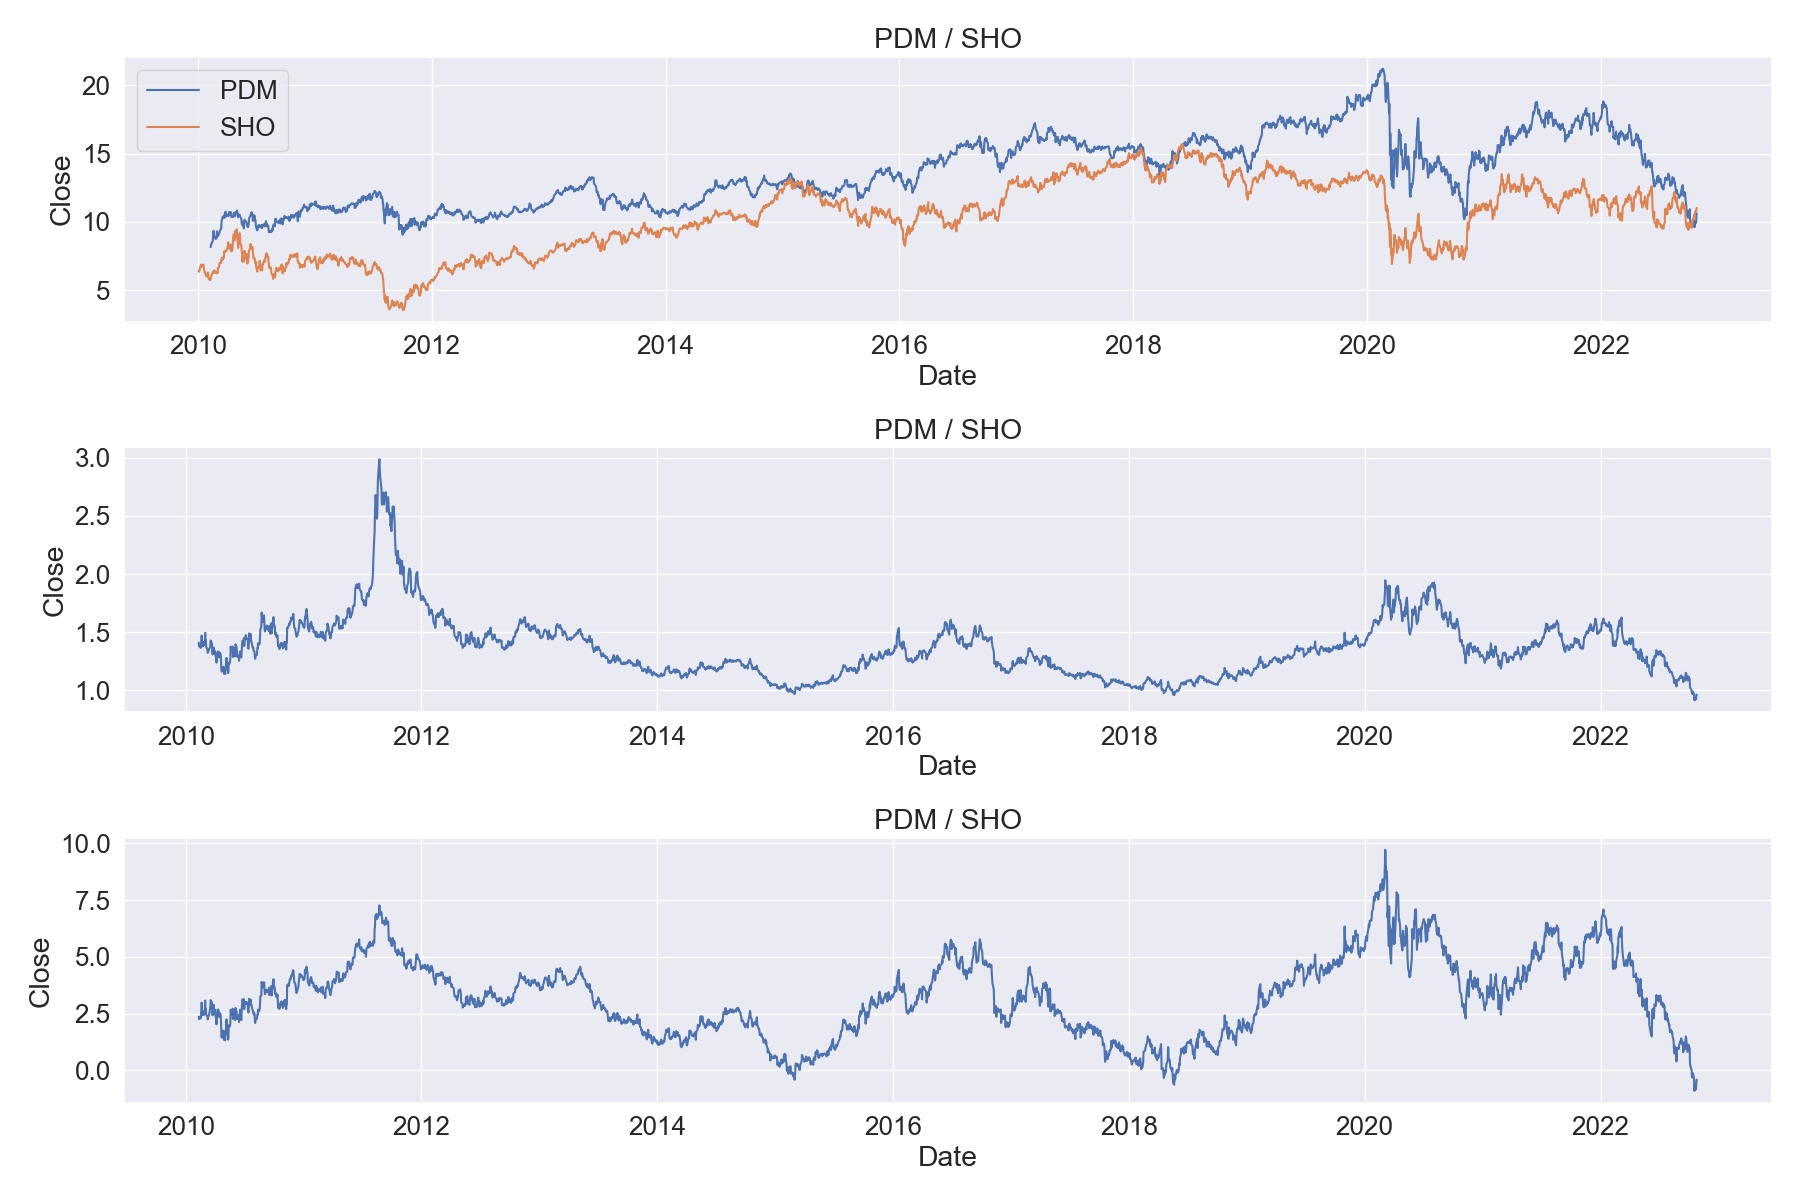

In [12]:
pair("PDM", "SHO", "Long position PDM P/E ratio = 26.157894, dividend: 0.0845, Gross profit: 317778000",
     "short position SHO P/E ratio = 15.823529, dividend: 0.0186, Gross Profit: 186085000");

Long BETA: 1.25
Short BETA: 0.75
LONG position STAR P/E ratio = 131.57143, dividend: 0.056399997, Gross Profit: 175104000
SHORT position LXP P/E ratio = 8.2972975, dividend: 0.0521, Gross profit: 296251000


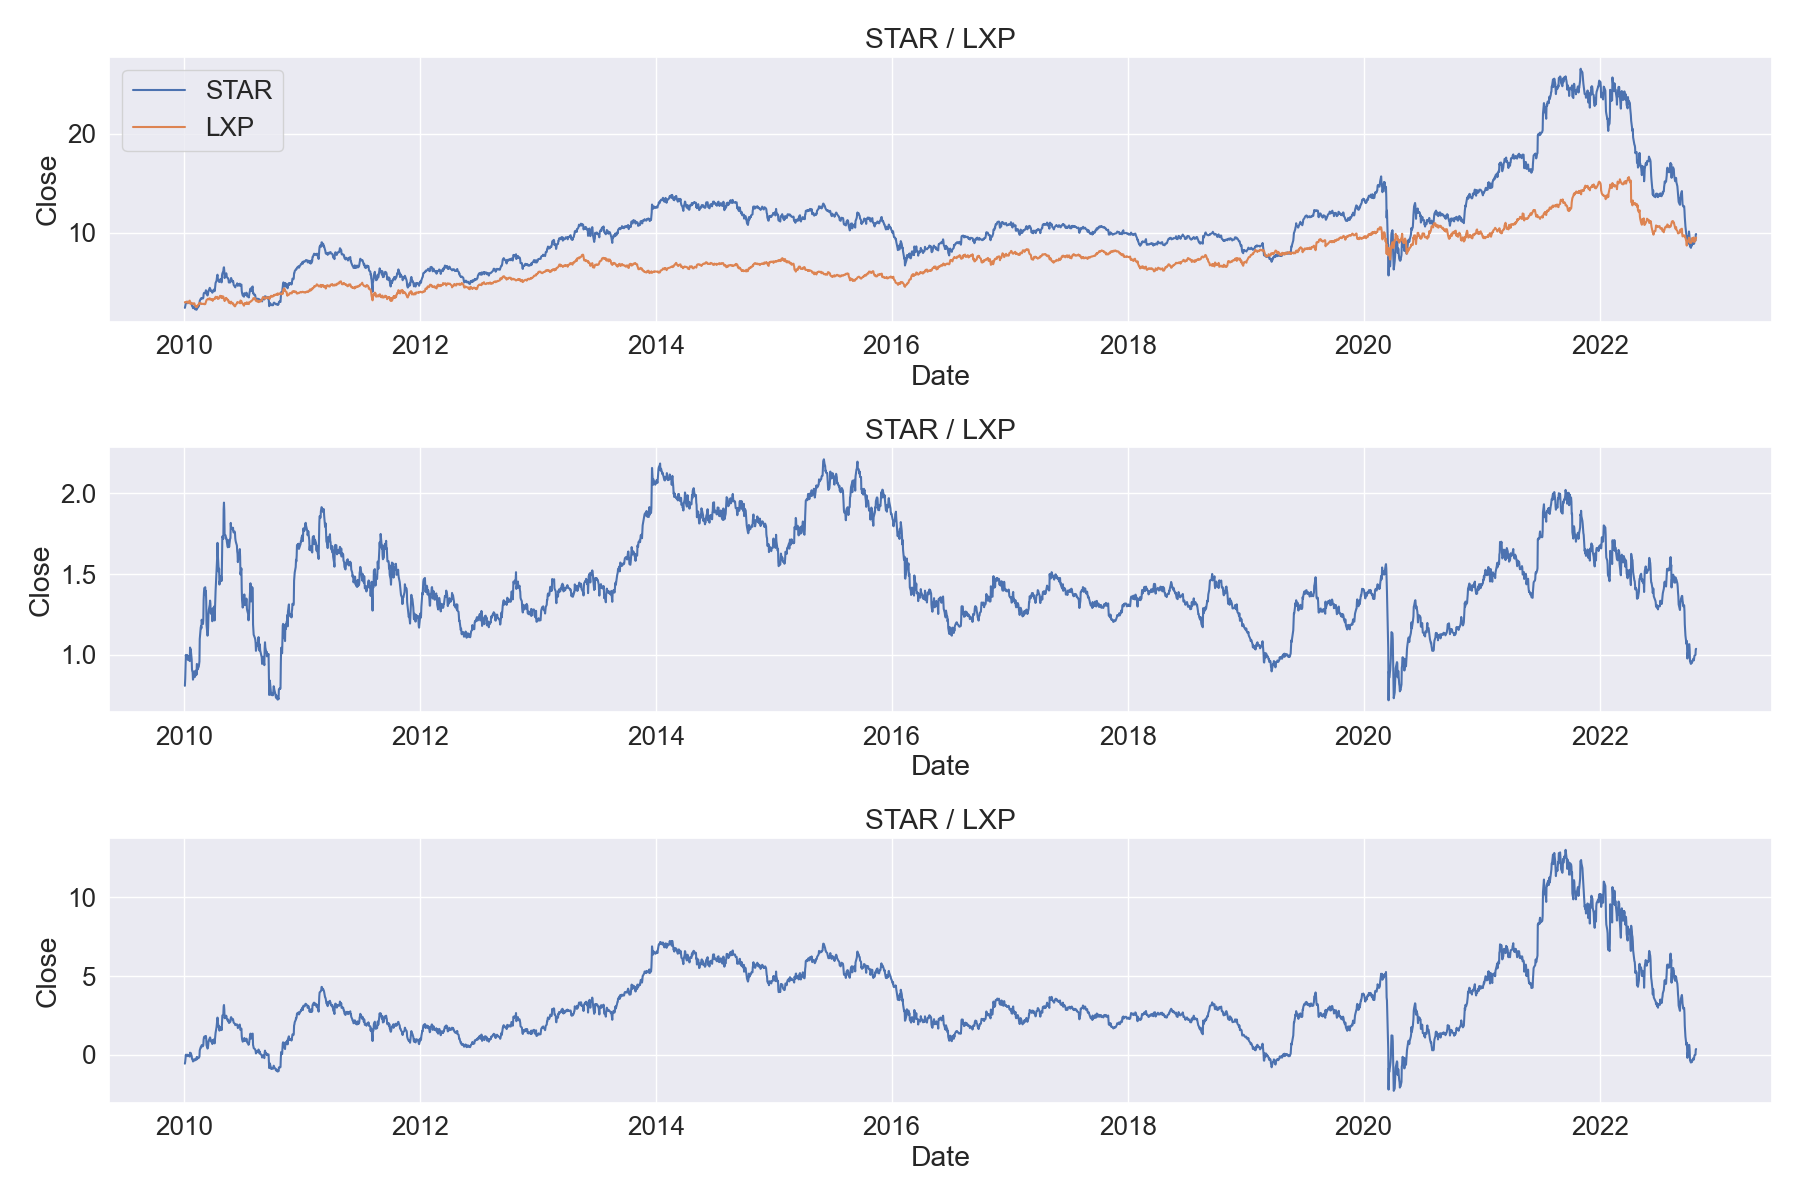

In [13]:
pair("STAR", "LXP", "LONG position STAR P/E ratio = 131.57143, dividend: 0.056399997, Gross Profit: 175104000",
     "SHORT position LXP P/E ratio = 8.2972975, dividend: 0.0521, Gross profit: 296251000");

Long BETA: 0.83
Short BETA: 0.83
LONG position VGR P/E ratio=16.199999, dividend: 0.0718, Gross Profit: 451158000
SHORT position PDM P/E ratio=5.33548, dividend: 0.061, Gross profit: 317778000


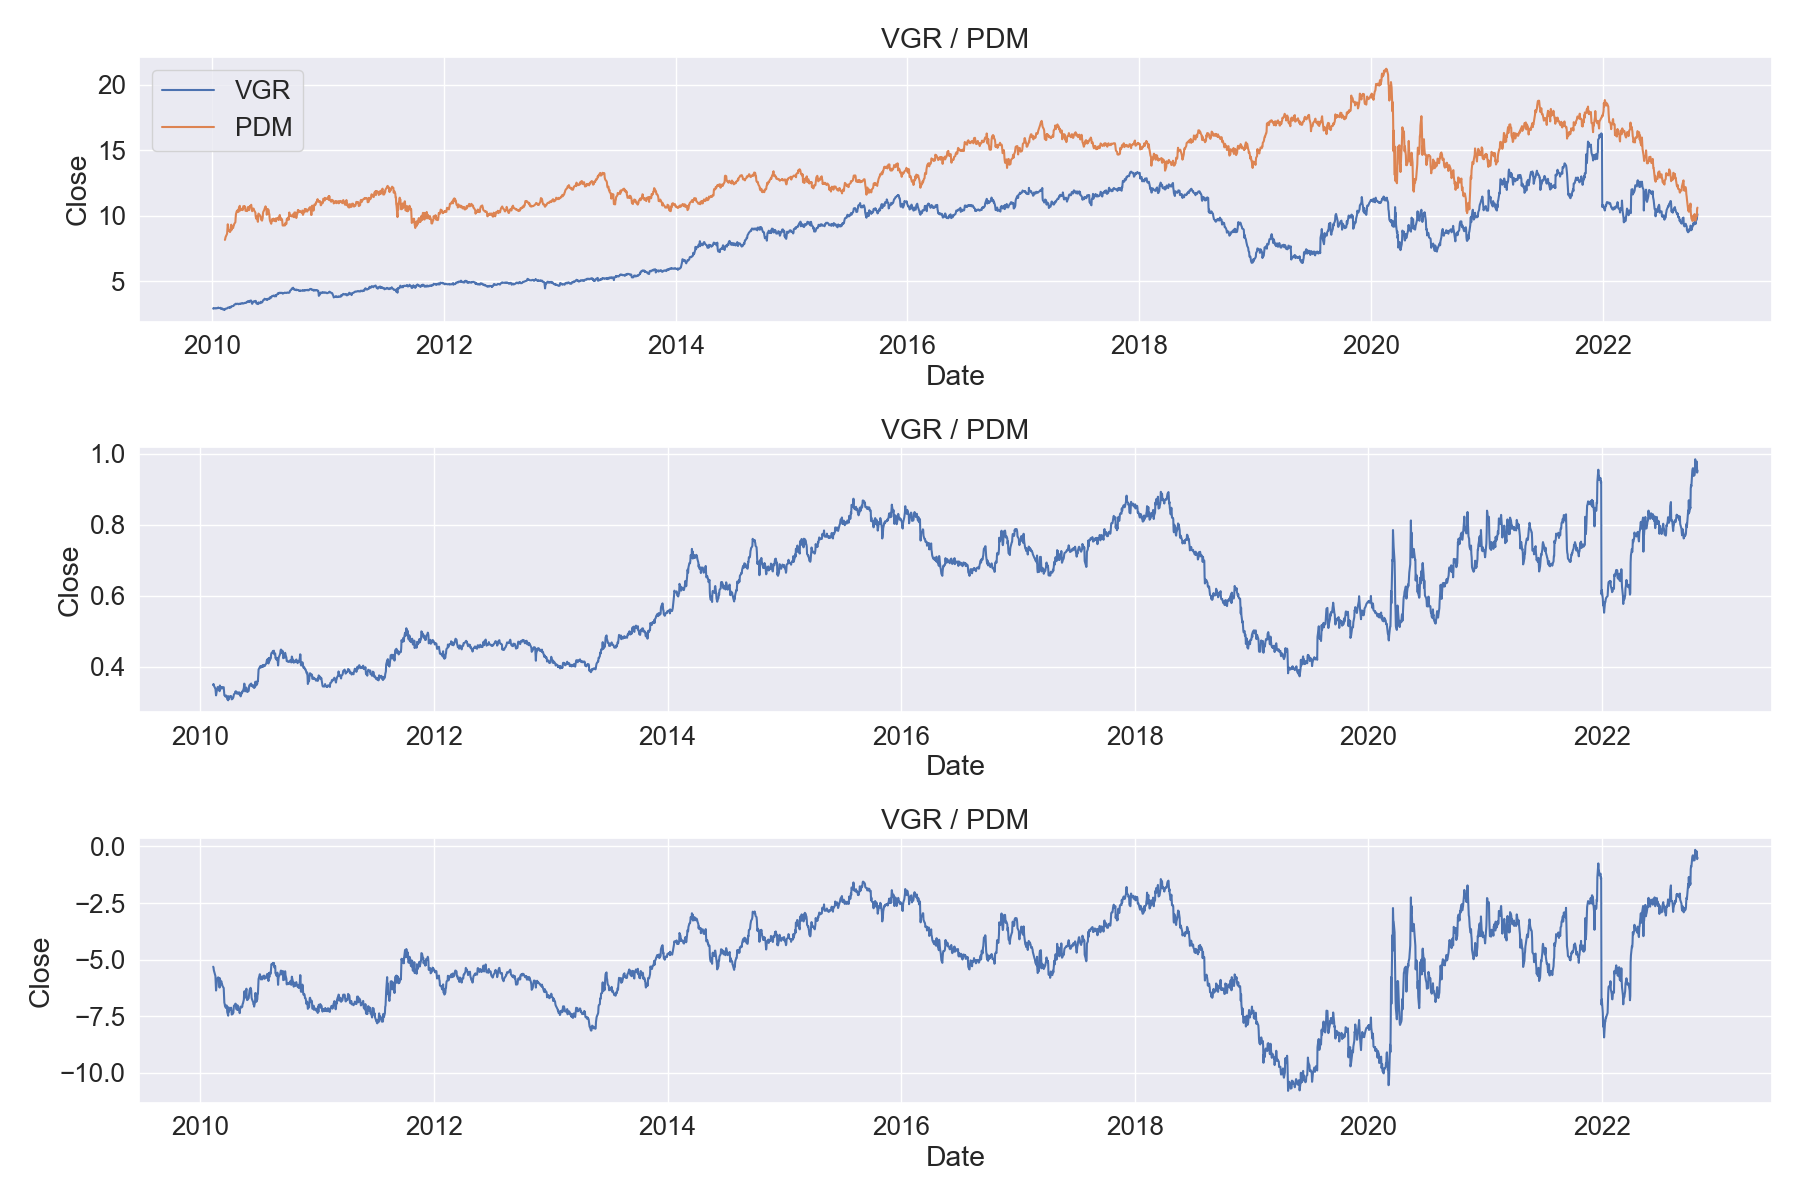

In [17]:
pair("VGR", "PDM", "LONG position VGR P/E ratio=16.199999, dividend: 0.0718, Gross Profit: 451158000",
     "SHORT position PDM P/E ratio=5.33548, dividend: 0.061, Gross profit: 317778000");

Long BETA: 0.82
Short BETA: 0.65
LONG position VGR P/E ratio=16.19, dividend: 0.071, Gross Profit: 451158
SHORT position SIRI P/E ratio=479.23, dividend: 0.013, Gross profit: 4403000


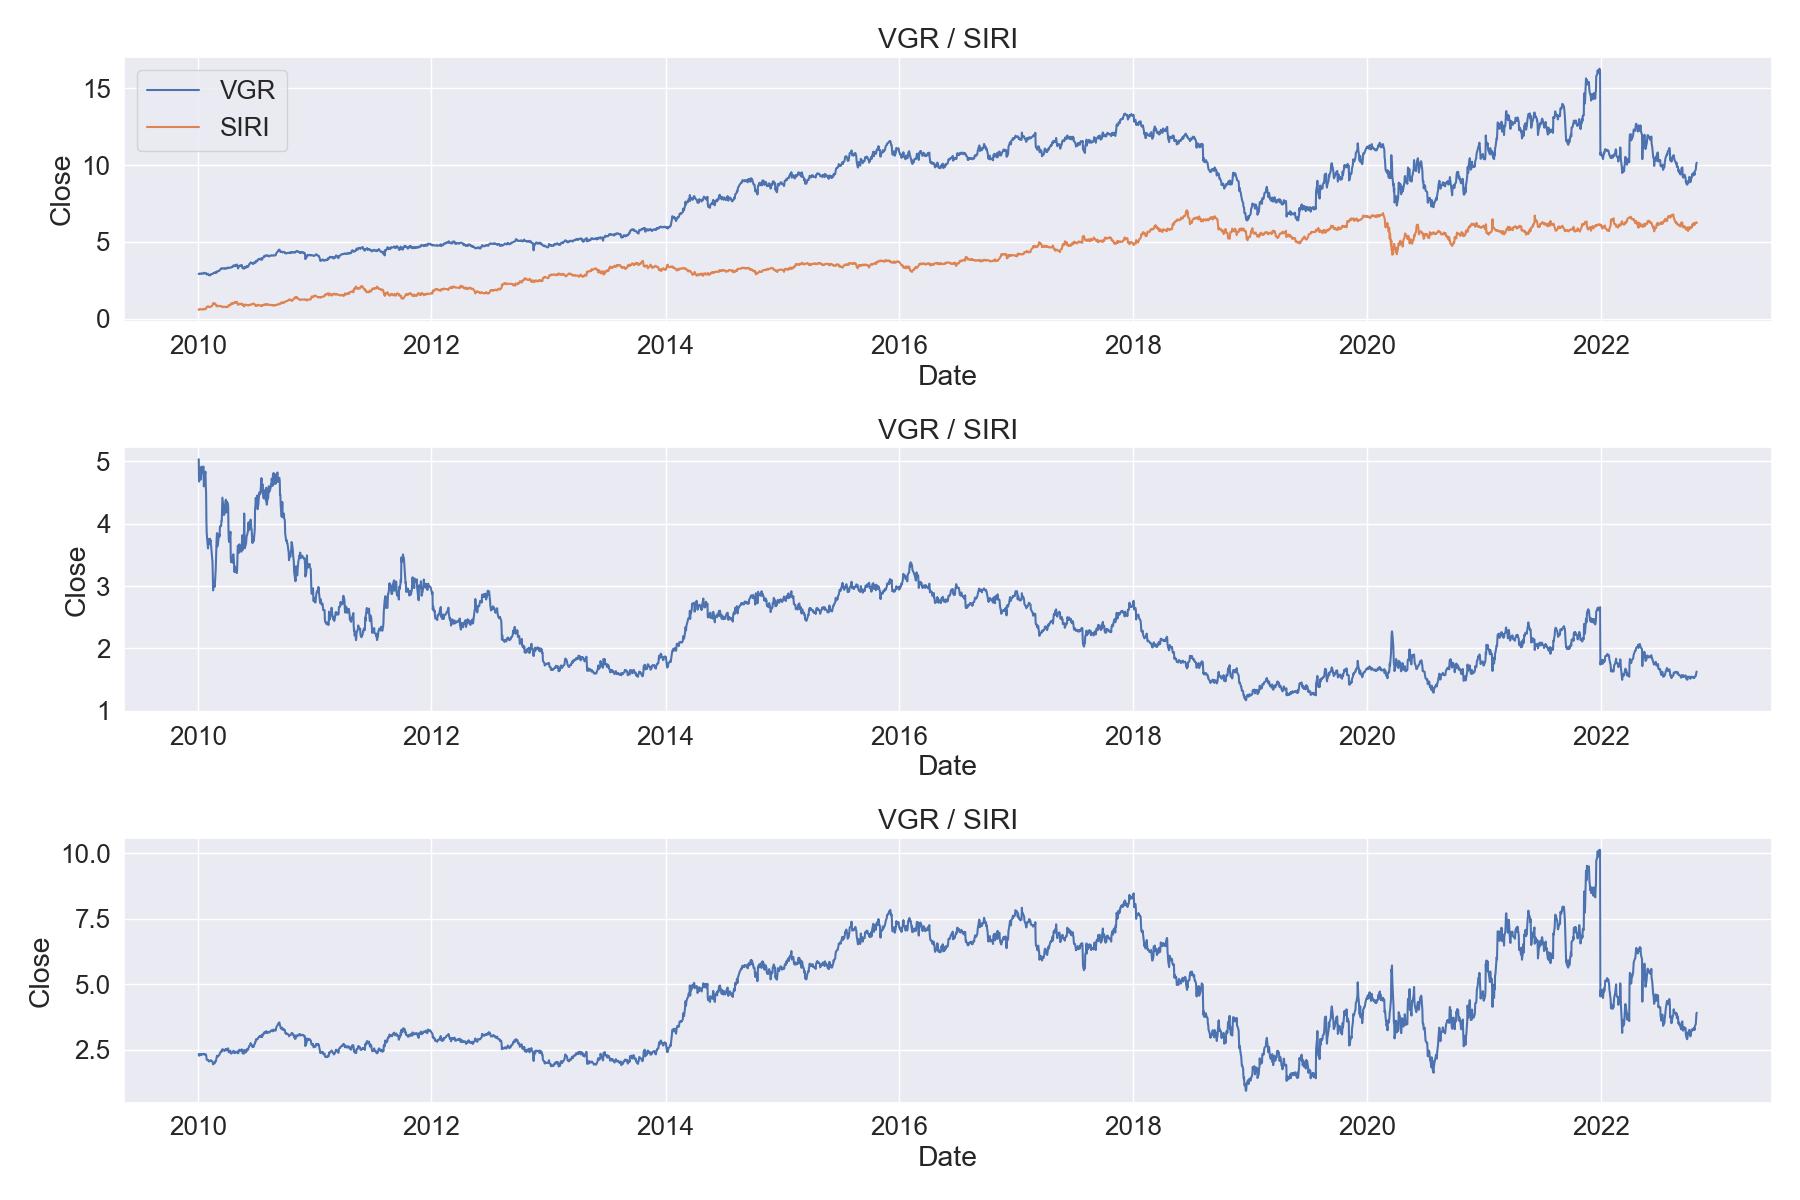

In [26]:
pair("VGR", "SIRI", "LONG position VGR P/E ratio=16.19, dividend: 0.071, Gross Profit: 451158",
     "SHORT position SIRI P/E ratio=479.23, dividend: 0.013, Gross profit: 4403000");

Long BETA: 1.43
Short BETA: 1.08
LONG position JBLU P/E ratio=None, dividend: None, Gross profit: 890000000
SHORT position WTI P/E ratio=8.010417, dividend: None, Gross Profit: 355509000


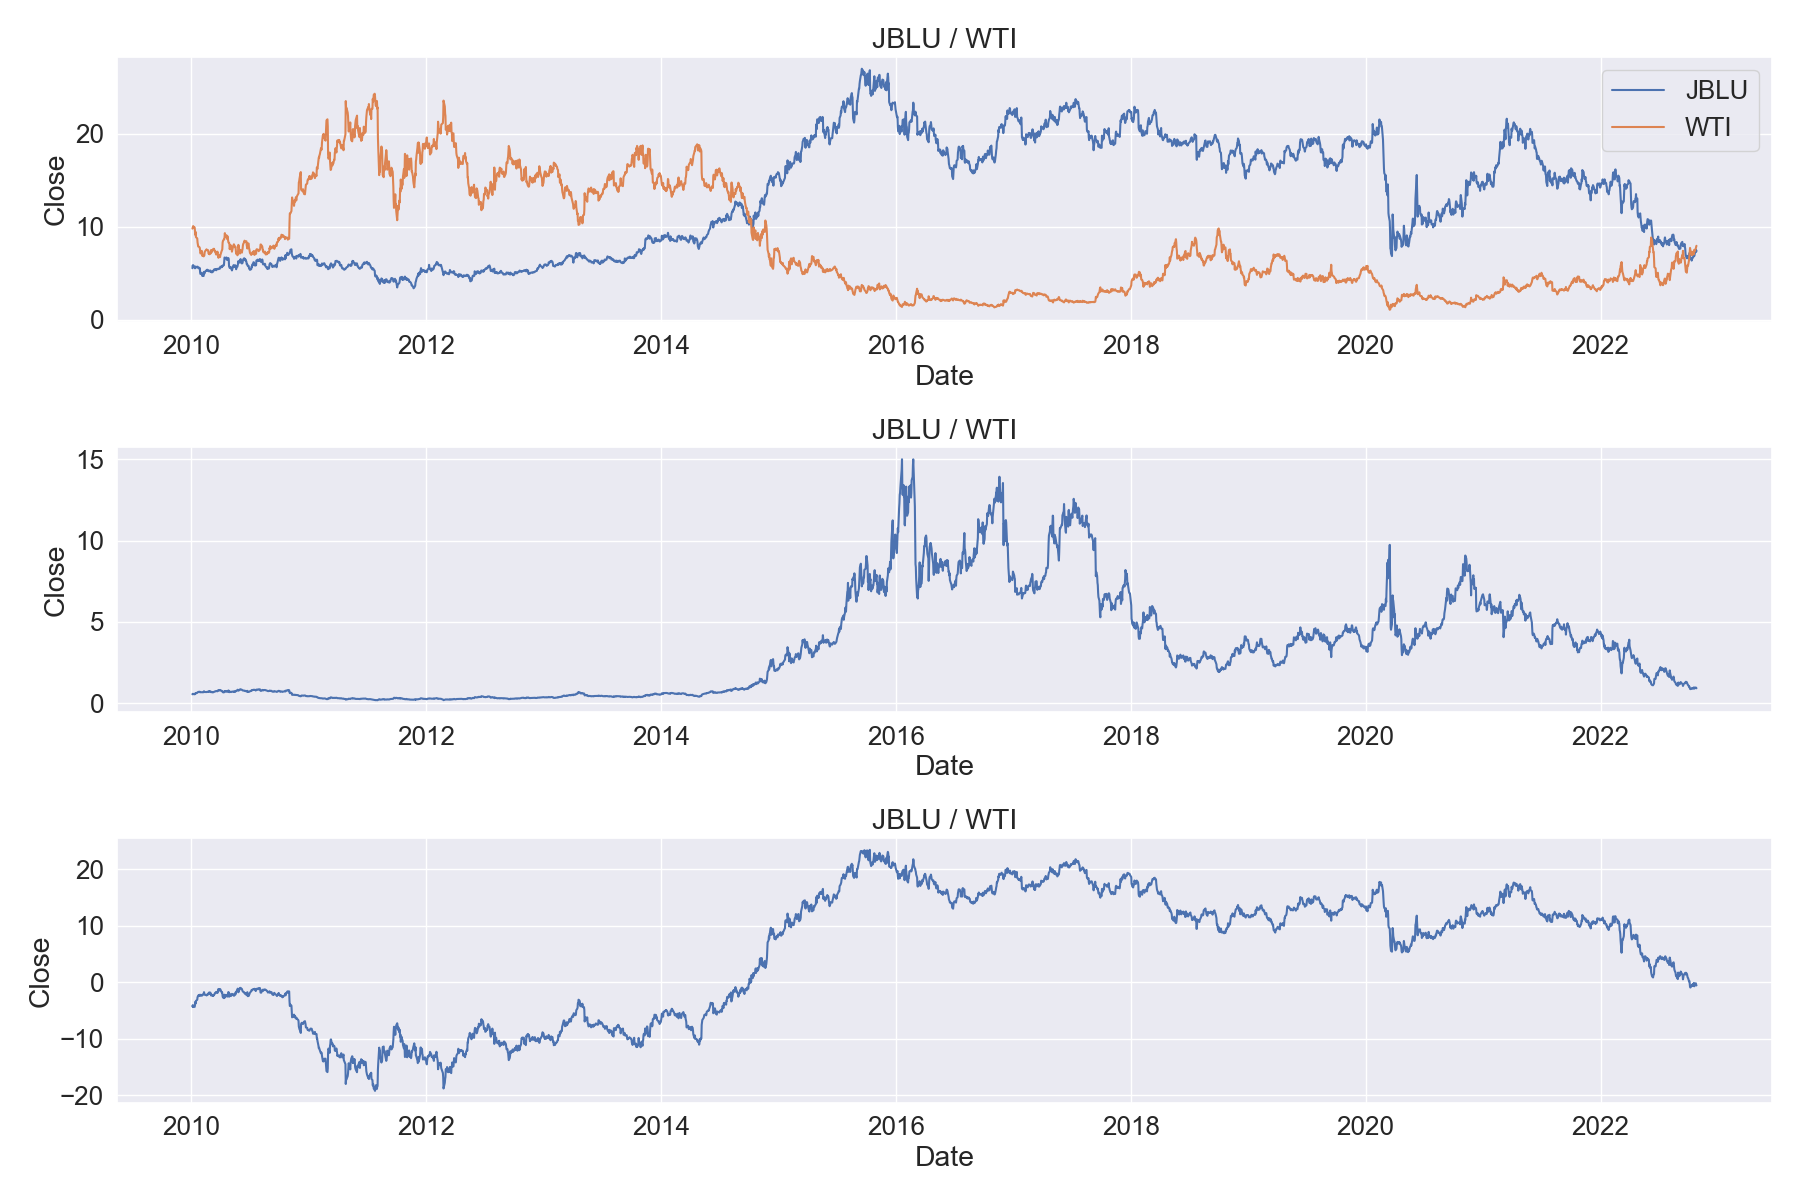

In [22]:
pair("JBLU", "WTI", "LONG position JBLU P/E ratio=None, dividend: None, Gross profit: 890000000",
     "SHORT position WTI P/E ratio=8.010417, dividend: None, Gross Profit: 355509000");